# Initial data read (Manchester Piccadilly)
Notebook to begin exploring the UK air pollution data made available by the department for environment, food and rural affairs: [UK Air Information Resource](https://uk-air.defra.gov.uk/).

&copy; Crown 2020 copyright Defra via uk-air.defra.gov.uk, licenced under the [Open Government Licence (OGL)](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/).  
  
Testing data pipeline developed with notebook ['1_0_explore_data_oxford.ipynb'](./1_0_explore_data_oxford.ipynb) on unseen data from a measurement station near Manchester Piccadilly.

In [1]:
%load_ext autoreload
%load_ext watermark
%load_ext lab_black

In [2]:
%autoreload 2

In [3]:
%watermark -ntz -p pandas -a Simon-Lee-UK

Simon-Lee-UK Mon Oct 05 2020 21:14:30 BST 

pandas 1.1.2


In [4]:
import sys
from pathlib import Path
import pandas as pd

repo_root = Path.cwd().resolve().parent

sys.path.append(str(repo_root))
interim_data_path = repo_root / "data" / "interim"
interim_data_path.mkdir(parents=True, exist_ok=True)

from src.inspect_site import preview_data, monitoring_site_summary

## Data info
Location: Manchester Piccadilly (MAN3)
All Data GMT hour ending  
Status: R = Ratified / P = Provisional / P* = As supplied  
Data available: 1995 - 2020

## Preview data and identify available years
First, we use a custom 'preview data' function to return a small sample of data from a single year's data set. 
We start by defining the range of years we may want to download data for; we also define the location of interest as described at the top notebook ['1_0_explore_data_oxford.ipynb'](./1_0_explore_data_oxford.ipynb):

In [5]:
location = "MAN3"
start_year = 1993
end_year = 2020

Next, we call the preview_data function with this information:

In [6]:
preview_df, valid_data_years = preview_data(location, start_year, end_year)

Generating data preview:  93%|█████████▎| 26/28 [00:29<00:02,  1.04s/it]


-------
WARNING
-------
Could not read data from: https://uk-air.defra.gov.uk/data_files/site_data/MAN3_1994.csv
Check the URL to ensure location code, year and file extension are all valid!


Generating data preview:  96%|█████████▋| 27/28 [00:29<00:00,  1.01it/s]


-------
WARNING
-------
Could not read data from: https://uk-air.defra.gov.uk/data_files/site_data/MAN3_1993.csv
Check the URL to ensure location code, year and file extension are all valid!


Generating data preview: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]

Preview data sampled from 2020


In [7]:
preview_df.head(3)

,Date,time,PM<sub>10</sub> particulate matter (Hourly measured),status,unit,Nitric oxide,status.1,unit.1,Nitrogen dioxide,status.2,...,unit.3,Ozone,status.4,unit.4,PM<sub>2.5</sub> particulate matter (Hourly measured),status.5,unit.5,Sulphur dioxide,status.6,unit.6
0,01-01-2020,01:00,NaN,NaN,NaN,13.84815,R,ugm-3,52.25977,R,...,ugm-3,10.17807,R,ugm-3,NaN,NaN,NaN,0.42717,R,ugm-3
1,01-01-2020,02:00,29.575,R,ugm-3 (FIDAS),8.02922,R,ugm-3,46.58023,R,...,ugm-3,13.23814,R,ugm-3,23.514,R,ugm-3 (Ref.eq),0.59804,R,ugm-3
2,01-01-2020,03:00,16.200,R,ugm-3 (FIDAS),4.66868,R,ugm-3,34.77832,R,...,ugm-3,20.50582,R,ugm-3,12.618,R,ugm-3 (Ref.eq),1.02521,R,ugm-3


The preview data function failed to find data for 1993 and 1994, this is communicated by warning messages printed by the function above.  
This missing years of data are therefore not returned in the 'valid_data_years' list, printed below.

In [8]:
valid_data_years

[2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995]

## Generate summary of available site data across multiple years
See notebook ['1_0_explore_data_oxford.ipynb'](./1_0_explore_data_oxford.ipynb) for more detail on exploratory steps; for more information on the 'monitoring_site_summary' function see: src.inspect_site or run `help(monitoring_site_summary)` in a notebook cell.

In [9]:
status_str = "status"
unit_str = "unit"
status_offset = -1
unit_offset = -2

Generating summary tables: 100%|██████████| 26/26 [00:31<00:00,  1.20s/it]


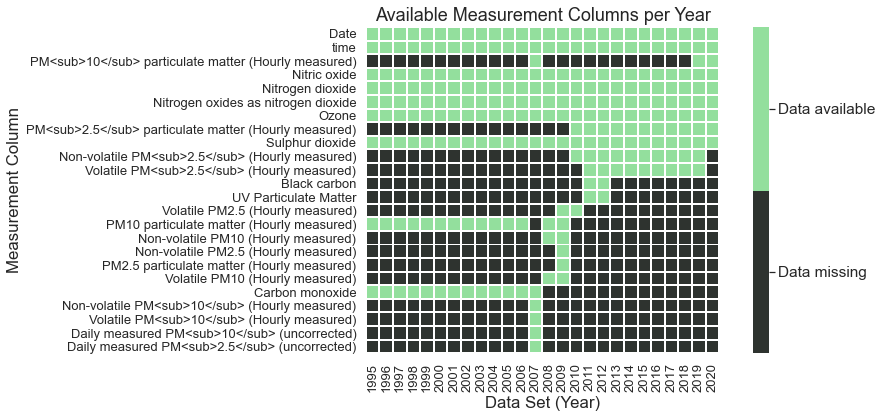

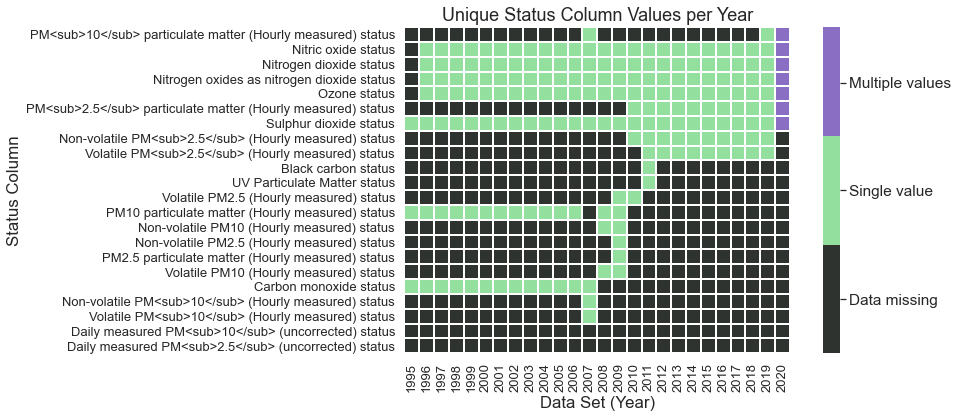

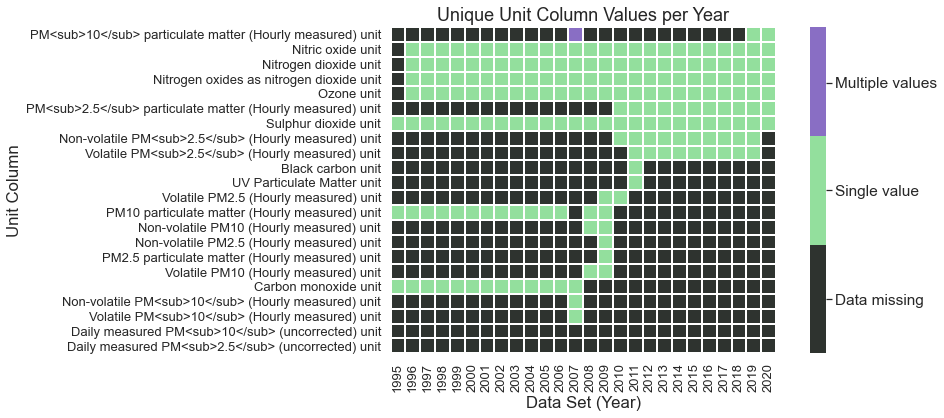

In [10]:
data_dict, measurement_summary, status_summary, unit_summary = monitoring_site_summary(
    location,
    valid_data_years,
    status_str=status_str,
    unit_str=unit_str,
    status_offset=status_offset,
    unit_offset=unit_offset,
)

In [11]:
measurement_summary

,Data Set (Year),Date,time,PM<sub>10</sub> particulate matter (Hourly measured),Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Ozone,PM<sub>2.5</sub> particulate matter (Hourly measured),Sulphur dioxide,...,PM10 particulate matter (Hourly measured),Non-volatile PM10 (Hourly measured),Non-volatile PM2.5 (Hourly measured),PM2.5 particulate matter (Hourly measured),Volatile PM10 (Hourly measured),Carbon monoxide,Non-volatile PM<sub>10</sub> (Hourly measured),Volatile PM<sub>10</sub> (Hourly measured),Daily measured PM<sub>10</sub> (uncorrected),Daily measured PM<sub>2.5</sub> (uncorrected)
0,2020,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2019,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2018,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,2016,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,2015,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
6,2014,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,2013,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,2012,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,2011,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
status_summary

,Data Set (Year),PM<sub>10</sub> particulate matter (Hourly measured) status,Nitric oxide status,Nitrogen dioxide status,Nitrogen oxides as nitrogen dioxide status,Ozone status,PM<sub>2.5</sub> particulate matter (Hourly measured) status,Sulphur dioxide status,Non-volatile PM<sub>2.5</sub> (Hourly measured) status,Volatile PM<sub>2.5</sub> (Hourly measured) status,...,PM10 particulate matter (Hourly measured) status,Non-volatile PM10 (Hourly measured) status,Non-volatile PM2.5 (Hourly measured) status,PM2.5 particulate matter (Hourly measured) status,Volatile PM10 (Hourly measured) status,Carbon monoxide status,Non-volatile PM<sub>10</sub> (Hourly measured) status,Volatile PM<sub>10</sub> (Hourly measured) status,Daily measured PM<sub>10</sub> (uncorrected) status,Daily measured PM<sub>2.5</sub> (uncorrected) status
0,2020,2 different values,2 different values,2 different values,2 different values,2 different values,2 different values,2 different values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,P (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011,False,R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),R (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
unit_summary

,Data Set (Year),PM<sub>10</sub> particulate matter (Hourly measured) unit,Nitric oxide unit,Nitrogen dioxide unit,Nitrogen oxides as nitrogen dioxide unit,Ozone unit,PM<sub>2.5</sub> particulate matter (Hourly measured) unit,Sulphur dioxide unit,Non-volatile PM<sub>2.5</sub> (Hourly measured) unit,Volatile PM<sub>2.5</sub> (Hourly measured) unit,...,PM10 particulate matter (Hourly measured) unit,Non-volatile PM10 (Hourly measured) unit,Non-volatile PM2.5 (Hourly measured) unit,PM2.5 particulate matter (Hourly measured) unit,Volatile PM10 (Hourly measured) unit,Carbon monoxide unit,Non-volatile PM<sub>10</sub> (Hourly measured) unit,Volatile PM<sub>10</sub> (Hourly measured) unit,Daily measured PM<sub>10</sub> (uncorrected) unit,Daily measured PM<sub>2.5</sub> (uncorrected) unit
0,2020,ugm-3 (FIDAS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (Ref.eq) (+ NaNs),ugm-3 (+ NaNs),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,ugm-3 (FIDAS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011,False,ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),ugm-3 (TEOM FDMS) (+ NaNs),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
